# Notebook 2

 [![open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/jouvetg/glamod/blob/main/02_notebook/glacier-modelling-2.ipynb)

In [1]:
! pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple igm-model-testing-package==3.0.5
! pip install ml-dtypes==0.5.3

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple
  Using cached ml_dtypes-0.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached ml_dtypes-0.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.3
    Uninstalling ml_dtypes-0.5.3:
      Successfully uninstalled ml_dtypes-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.17.1 which is incompatible.
jax 0.7.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tensorstore 0.1.78 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.
ten

In [2]:
import sys, os

if "google.colab" in sys.modules:
    print("Running in Colab: cloning repo...")
    !git clone --depth 1 https://github.com/jouvetg/glamod.git
    !apt-get install tree -q
else:
    print("Running locally: using local files.")

Running in Colab: cloning repo...
Cloning into 'glamod'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 70 (delta 5), reused 55 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 14.04 MiB | 8.96 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (72.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 125081 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tre

In [11]:
if "google.colab" in sys.modules:
    %cd /content/glamod/02_notebook

/content/glamod/02_notebook


In [50]:
! igm_run +experiment=params_findel

2025-11-05 08:56:12.697932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 08:56:12.719364: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 08:56:12.725329: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 08:56:12.740182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 08:56:15.527146: W tensorflow/comp

In [40]:
print(A[-1])

outputs/2025-11-05/08-09-42/output.nc


In [49]:
from helper import *
import glob

# Find all output files
A = glob.glob('outputs/*/*/output.nc')
print(f"Found {len(A)} output file(s):", A)

if A:
    # Animate the last run
    animate_glacier_evolution("outputs/2025-11-05/08-56-42/output.nc")
else:
    print("No output.nc files found. Please run the model first.")


Found 3 output file(s): ['outputs/2025-11-05/08-44-37/output.nc', 'outputs/2025-11-05/08-39-58/output.nc', 'outputs/2025-11-05/08-09-42/output.nc']


FileNotFoundError: [Errno 2] No such file or directory: b'/content/glamod/02_notebook/outputs/2025-11-05/08-28-42/output.nc'

Found 1 time series file(s). Using: outputs/2025-11-05/08-09-42/output_ts.nc

Reading time series data from: /content/glamod/02_notebook/outputs/2025-11-05/08-09-42/output_ts.nc



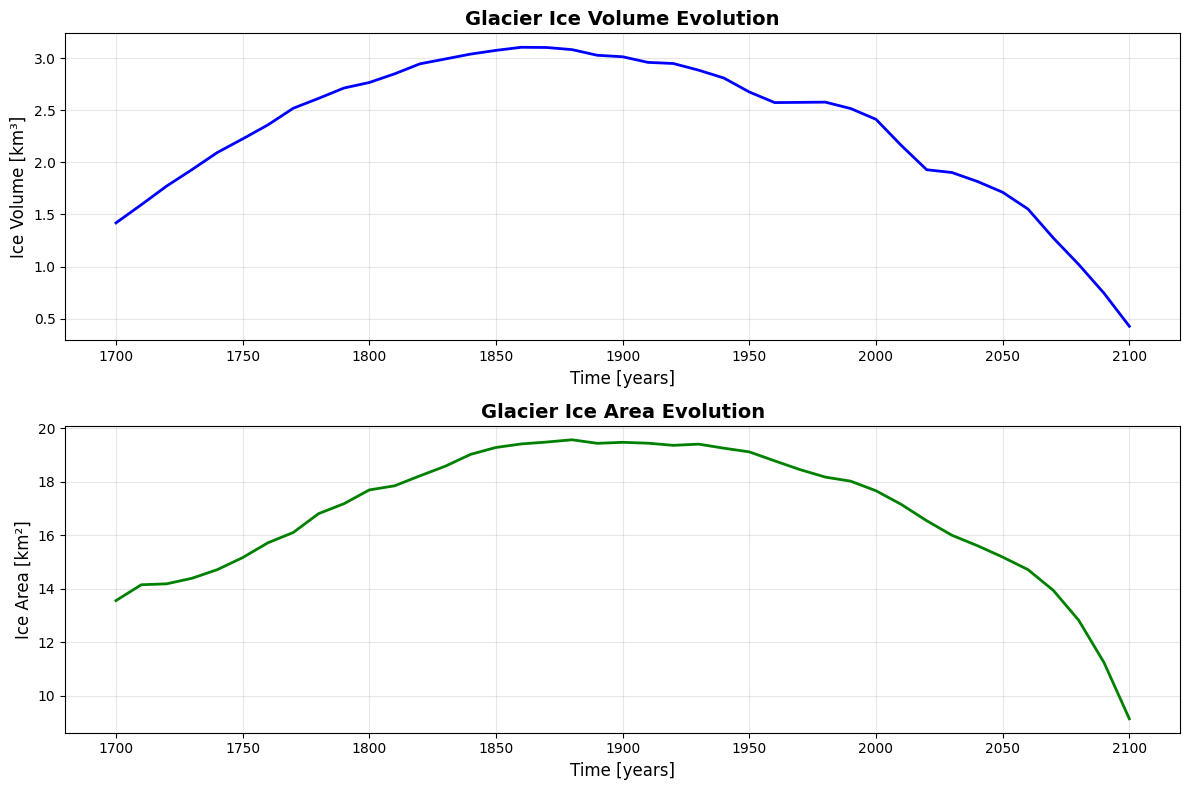


SUMMARY STATISTICS

Ice Volume:
  Initial: 1.42 km³
  Final:   0.43 km³
  Change:  -0.99 km³

Ice Area:
  Initial: 13.55 km²
  Final:   9.14 km²
  Change:  -4.42 km²


In [14]:
from helper import *
import glob
import os

# Find all time series files and select the most recent one
ts_files = sorted(glob.glob('outputs/*/*/output_ts.nc'))

if ts_files:
    # Get the absolute path to ensure it works from any directory
    ts_file = os.path.abspath(ts_files[-1])
    print(f"Found {len(ts_files)} time series file(s). Using: {ts_files[-1]}\n")
    # Analyze the time series from the most recent run
    analyze_time_series(ts_file)
else:
    print("No output_ts.nc file found. Please run the model first.")